## Titanic Disaster Survival Prediction ##

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# loading datasets
train=pd.read_csv("C:/Users/sriva/Desktop/titanic full data/train.csv")
test=pd.read_csv("C:/Users/sriva/Desktop/titanic full data/test.csv")

In [3]:
# Checking shape of data
train.shape , test.shape

((891, 12), (418, 11))

In [4]:
train.columns , test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

Data Preprocessing and Exploratory Data Analysis

In [5]:
# Analyzing data
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.Survived.value_counts()
# Out of 891 observations only 342 will survived that is about 38% of survival rate approximately.
# The data is considered as semi imbalanced dataset.

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# Segregating into continuous and categorical features for our analysis alongwith target variable Survived
cat_features=train[['Name', 'Sex','Ticket','Cabin', 'Embarked','Survived']]
# Drop all categorical features
cont_features=train.drop(cat_features,axis=1)
cont_features.drop('PassengerId',axis=1,inplace=True)
cont_features['Survived']=train['Survived']

In [9]:
cont_features.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0


In [10]:
cat_features.head()

,Name,Sex,Ticket,Cabin,Embarked,Survived
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1
4,"Allen, Mr. William Henry",male,373450,NaN,S,0


In [11]:
# Looking at general distribution of these features
cont_features.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


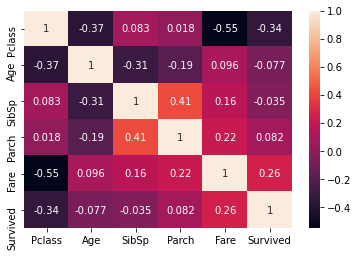

In [12]:
# Look at the correlation between continuous features
cont_features.corr()
corr_plot = sns.heatmap(cont_features.corr(),annot=True)

From above correlation plot we can say that there is moderate negative correlation between Fare and passengerClass it means that with increase in passengerClass fare of ticket is reduced and vice-versa.
There is also some correaltion between Parch and sibSp may be it will help in creating new features.

In [13]:
# look at Fare by different passenger class levels as they have some correlation betwen them.
cont_features.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [14]:
from scipy import stats

In [15]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(cont_features.groupby('Survived')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    survived = cont_features[cont_features['Survived']==1][feature]
    not_survived=cont_features[cont_features['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived,not_survived,equal_var=False)
    print('t_statistics : {:.1f}, p-value: {:.3}'.format(tstat , pval))
    

In [16]:
for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_cont_feature(feature)


*** Results for Pclass ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t_statistics : -10.3, p-value: 2.91e-23
None

*** Results for Age ***
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t_statistics : nan, p-value: nan
None

*** Results for SibSp ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t_statistics : -1.2, p-value: 0.233
None

*** Results for Parch ***
         

In [17]:
# Analysing missingness of age by different fields.   
cont_features.groupby(cont_features['Age'].isnull()).mean()

,Pclass,Age,SibSp,Parch,Fare,Survived
Age,,,,,,
False,2.236695,29.699118,0.512605,0.431373,34.694514,0.406162
True,2.598870,NaN,0.564972,0.180791,22.158567,0.293785


By looking table we can conclude that peoples whose age are missing are- 
a) Mostly from Pclass 2.
b) Having spend lower fare.
c) Less number of parents and children whose age are missing.
d) Having less chance to survive as of 29%.

C:\Users\sriva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

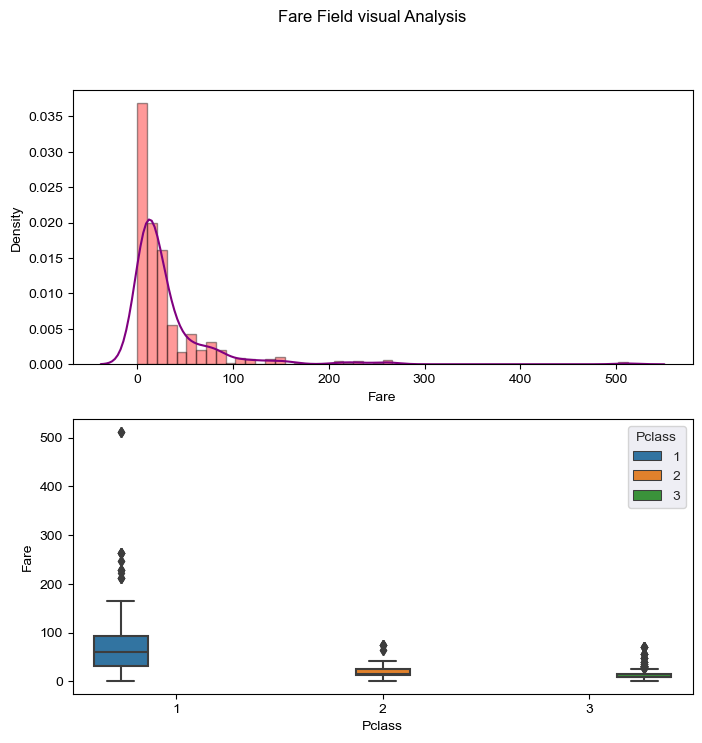

In [18]:
fx,ax=plt.subplots(nrows=2,ncols=1,figsize=(8,8),dpi=100)
plt.suptitle('Fare Field visual Analysis')
sns.set_style("darkgrid")
sns.distplot(train.Fare,color='purple',hist_kws={'color':'red','edgecolor':'black'},ax=ax[0])
sns.boxplot(y=train.Fare,x=train.Pclass,data=train,ax=ax[1],hue='Pclass')

C:\Users\sriva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

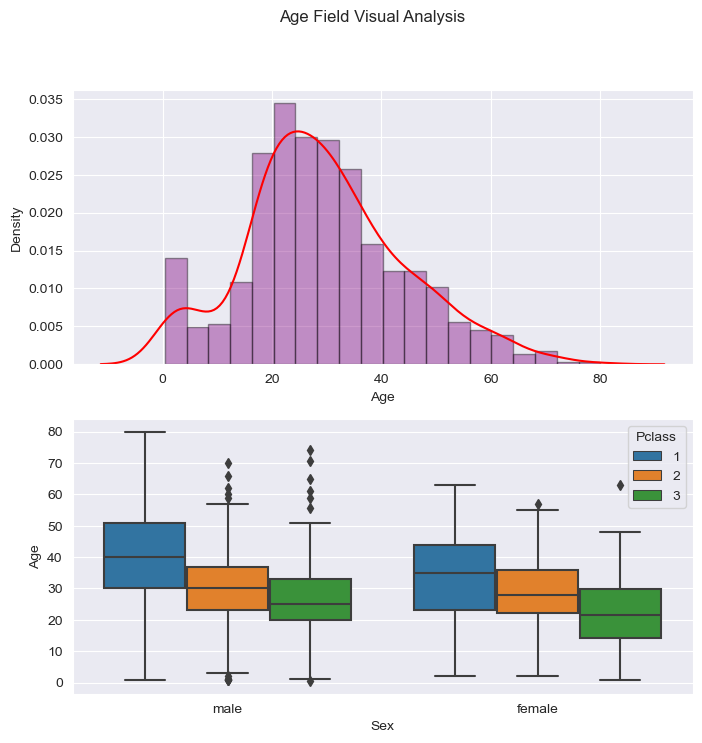

In [19]:
fx , ax=plt.subplots(nrows=2,ncols=1,figsize=(8,8),dpi=100)
sns.set_style("darkgrid")
plt.suptitle("Age Field Visual Analysis")
sns.distplot(train.Age,color="Red",hist_kws={'color':'purple','edgecolor':'black'},ax=ax[0])
sns.boxplot(y=train.Age,x="Sex",hue='Pclass',data=train,ax=ax[1])

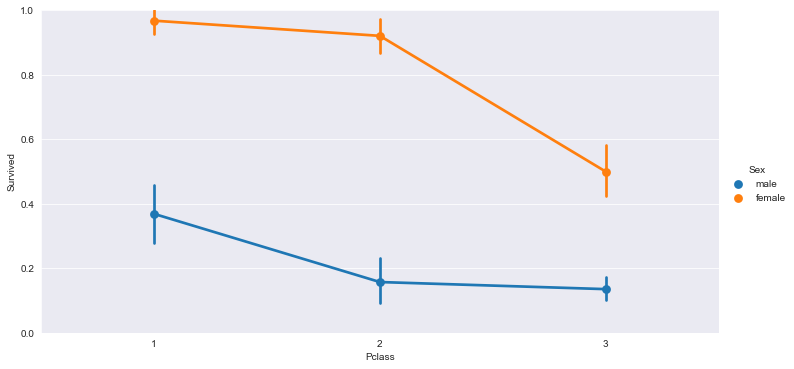

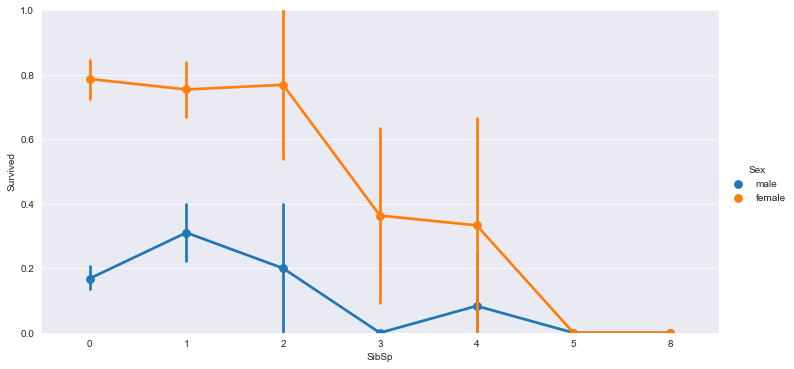

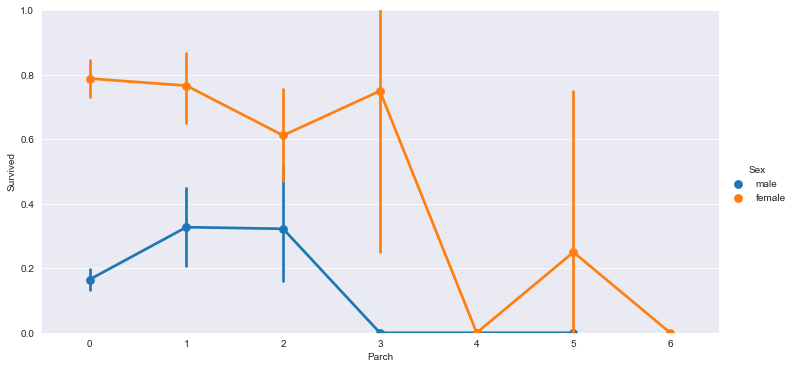

In [20]:
for col in ['Pclass','SibSp','Parch']:
    sns.catplot(x=col,y='Survived',data=train,kind='point',aspect=2,hue="Sex")
    plt.ylim(0,1)

Our categorical plot gives following insights-
a) Survival rate of elite class people is greater.
b) Parent children group abroad which are less than 4 in number have greater chances of survival.
c) Sibling spouses group abroad which are less than 3 in number have greater chance of survival.
d) Under each categorical plot survival rate of female is greater than male.

(0.0, 1.0)

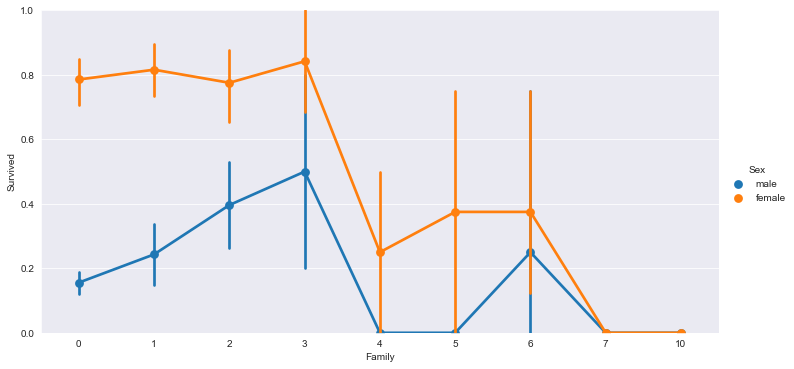

In [21]:
'''
Creating new feature family by combining SibSp and Parch as above crrelation plot we see there is some correaltion
between SibSp .and Parch
''' 
train['Family']=train['SibSp']+train['Parch']
# Plotting new features
sns.catplot(x='Family',y='Survived',data=train,kind='point',aspect=2,hue='Sex')
plt.ylim(0,1)

Less number of members in family has greater chance of survival.

In [22]:
# Missing values in continuous features
cont_features.isnull().sum()

Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [23]:
# Missing values in categorical features
cat_features.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
Survived      0
dtype: int64

In [24]:
# Unique values in categorical features
for col in cat_features.columns:
    print('{}: {} unique values'.format(col,cat_features[col].nunique()))

Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values
Survived: 2 unique values


In [25]:
# check survival rate by gender
cat_features.groupby('Sex').mean()
# Survival rate of female is greater than male.

,Survived
Sex,
female,0.742038
male,0.188908


In [26]:
# is cabin misssing at random?
cat_features.groupby(cat_features['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


Missing cabin number has less possiblilty of survival.
Data which are missing are missing at random as it does not shows any pattern 
as earlier shown by Age variable.

In [27]:
# Unique value in Ticket
cat_features.Ticket.value_counts()

CA. 2343             7
1601                 7
347082               7
347088               6
CA 2144              6
                    ..
349209               1
STON/O 2. 3101293    1
113056               1
3101264              1
SC/AH 3085           1
Name: Ticket, Length: 681, dtype: int64

In [28]:
# create title feature
cat_features['Title_raw']=cat_features.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
cat_features['Title']=cat_features['Title_raw'].apply(lambda x: x if x in ['Master','Miss','Mr','Mrs'] else 'others')
cat_features['cabin_ind'] = np.where(cat_features['Cabin'].isnull(),0,1)
cat_features.tail(6)

<ipython-input-28-93b29c0e5261>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features['Title_raw']=cat_features.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
<ipython-input-28-93b29c0e5261>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features['Title']=cat_features['Title_raw'].apply(lambda x: x if x in ['Master','Miss','Mr','Mrs'] else 'others')
<ipython-input-28-93b29c0e5261>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Name,Sex,Ticket,Cabin,Embarked,Survived,Title_raw,Title,cabin_ind
885,"Rice, Mrs. William (Margaret Norton)",female,382652,NaN,Q,0,Mrs,Mrs,0
886,"Montvila, Rev. Juozas",male,211536,NaN,S,0,Rev,others,0
887,"Graham, Miss. Margaret Edith",female,112053,B42,S,1,Miss,Miss,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S,0,Miss,Miss,0
889,"Behr, Mr. Karl Howell",male,111369,C148,C,1,Mr,Mr,1
890,"Dooley, Mr. Patrick",male,370376,NaN,Q,0,Mr,Mr,0


In [29]:
# Survival rate by title
cat_features.pivot_table('Survived',index=['Title','Sex'],aggfunc=['count','mean'])

count      mean
              Survived  Survived
Title  Sex                      
Master male         40  0.575000
Miss   female      182  0.697802
Mr     male        517  0.156673
Mrs    female      125  0.792000
others female        7  1.000000
       male         20  0.250000

We are getting very intresting insight that is unmarried males have greater survival rate than married males.

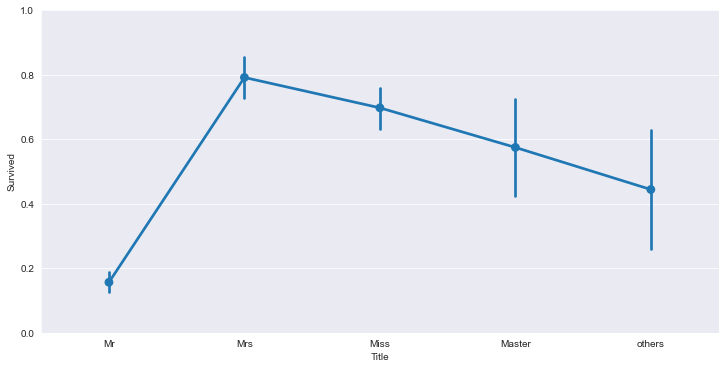

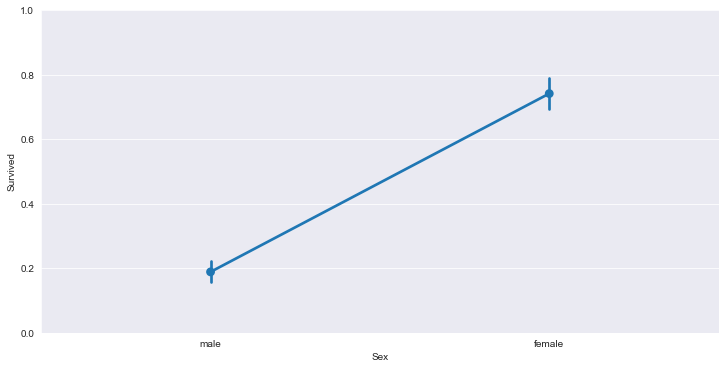

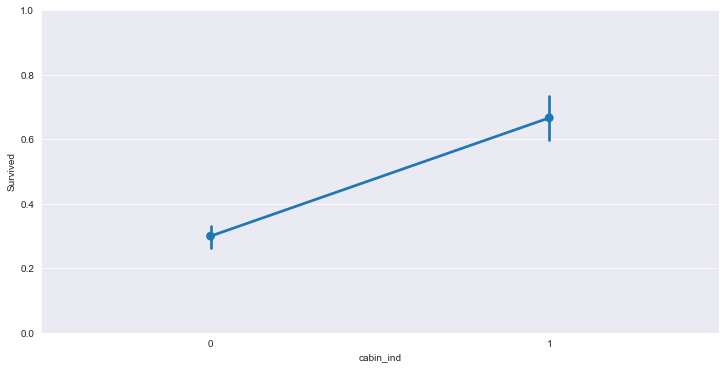

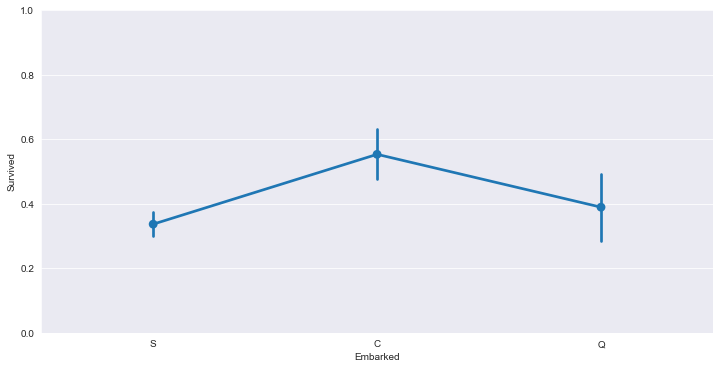

In [30]:
# Plotting categorical features
for col in ['Title','Sex','cabin_ind','Embarked']:
    sns.catplot(x=col,y='Survived',data=cat_features,kind='point',aspect=2,)
    plt.ylim(0,1)

In [31]:
cat_features.pivot_table('Survived',index=['cabin_ind'],aggfunc=['count'],columns='Embarked')

count         
Embarked      C   Q    S
cabin_ind               
0            99  73  515
1            69   4  129

In [32]:
############# Missing value treatment ###########
train.groupby(train['Age'].isnull()).median()
train['Age']=train['Age'].fillna(train['Age'].median())
# Adding variable 'O' to show missing data
train['Embarked']=train['Embarked'].fillna('O')

In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family           0
dtype: int64

In [34]:
train.drop(['PassengerId','Ticket','Cabin','Name'],axis=1,inplace=True)
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Family      0
dtype: int64

In [35]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [36]:
train['Sex'].replace({'male':1,'female':0},inplace=True)

In [37]:
# Type casting
# converting categorical variable into continuos variable for our analysis. 
train['Embarked'].replace({'C': 1,'Q': 2,'S': 3,'O': 3},inplace=True)
'''where C=1 refers to cherbourg
         Q=2 refers to queenstown
         S=3 refers to Southampton'''
train.Embarked.value_counts()

3    646
1    168
2     77
Name: Embarked, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x=train.drop(['Survived'],axis=1)
y=train['Survived']
# Splitting Data
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=6)

In [39]:
# Checking shape
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((712, 8), (179, 8), (712,), (179,))

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [41]:
# Model Prediction 
pred=gnb.predict(x_val)
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_gnb=confusion_matrix(pred,y_val)
accuracy_gnb=accuracy_score(pred,y_val)
CR_gnb=classification_report(pred,y_val)
accuracy_gnb,print(CR_gnb)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       116
           1       0.76      0.79      0.78        63

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.84      0.84       179



(0.8379888268156425, None)

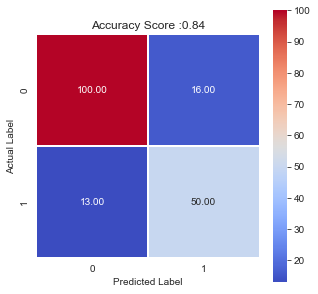

In [43]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_gnb,annot=True,fmt='0.2f',linewidths=0.5,square=True,cmap='coolwarm')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
A=f'Accuracy Score :{accuracy_gnb:.2f}'
plt.title(A)
plt.show()

In [44]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [45]:
predlr=lr.predict(x_val)
cm_lr=confusion_matrix(predlr,y_val)
accuracy_lr=accuracy_score(predlr,y_val)
CR_lr=classification_report(predlr,y_val)
accuracy_lr,print(CR_lr)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       122
           1       0.74      0.86      0.80        57

    accuracy                           0.86       179
   macro avg       0.84      0.86      0.85       179
weighted avg       0.87      0.86      0.86       179



(0.8603351955307262, None)

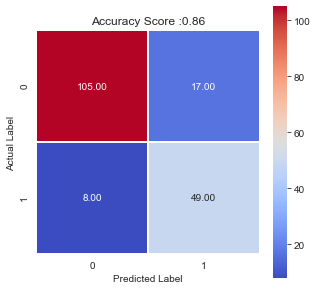

In [46]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_lr,annot=True,fmt='0.2f',linewidths=0.5,square=True,cmap='coolwarm')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
A=f'Accuracy Score :{accuracy_lr:.2f}'
plt.title(A)
plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
pred_rfc=rfc.predict(x_val)
cm_rfc=confusion_matrix(pred_rfc,y_val)
accuracy_rfc=accuracy_score(pred_rfc,y_val)
CR_rfc=classification_report(pred_rfc,y_val)
accuracy_rfc,print(CR_rfc)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       116
           1       0.76      0.79      0.78        63

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.84      0.84       179



(0.8379888268156425, None)

In [49]:
model_evaluation=pd.DataFrame({'Model Name':['Guassian Naive Bayes','Logistic Regression','Random Forest'],
                  'Accuracy Scores':[accuracy_gnb,accuracy_lr,accuracy_rfc]},index={1,2,3})
model_evaluation

,Model Name,Accuracy Scores
1,Guassian Naive Bayes,0.837989
2,Logistic Regression,0.860335
3,Random Forest,0.837989


By above analysis we can conclude that logistic regression model behaves better than other two models which we have used.

## Test data Analysis ##

In [50]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [51]:
# test data preprocessing.
test['Sex'].replace({'male':1,'female':0},inplace=True)

In [52]:
# Type casting
# converting categorical variable into continuos variable for our analysis. 
test['Embarked'].replace({'C': 1,'Q': 2,'S': 3},inplace=True)
'''where C=1 refers to cherbourg
         Q=2 refers to queenstown
         S=3 refers to Southampton'''
train.Embarked.value_counts()

3    646
1    168
2     77
Name: Embarked, dtype: int64

Maximum number of passengers are embarked from Southampton.

In [53]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

C:\Users\sriva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

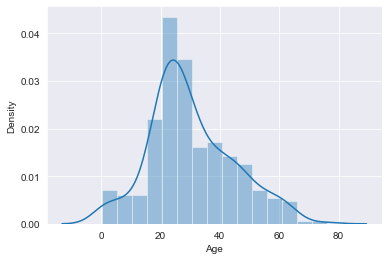

In [54]:
sns.distplot(test.Age)

In [55]:
test.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [56]:
test.Age=test.Age.fillna(test.Age.median())

In [57]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [58]:
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


C:\Users\sriva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

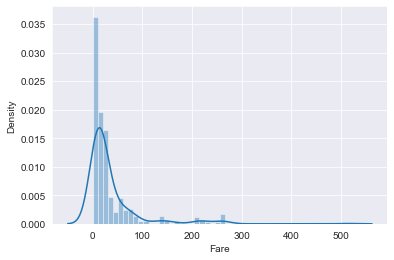

In [60]:
sns.distplot(test.Fare)

In [61]:
test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [62]:
# As influenced by outliers so we are applying median impution.
test.Fare=test.Fare.fillna(test.Fare.median())

In [63]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [64]:
test['Family']=test['SibSp']+test['Parch']
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,1,34.5,0,0,7.8292,2,0
1,3,0,47.0,1,0,7.0000,3,1
2,2,1,62.0,0,0,9.6875,2,0
3,3,1,27.0,0,0,8.6625,3,0
4,3,0,22.0,1,1,12.2875,3,2


In [65]:
# Here we are using logistic regression classifier model as above in train dataset it gives best acccracy. 
pred_t=lr.predict(test)
pred_t

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
gender_submission=pd.read_csv("C:/Users/sriva/Desktop/titanic full data/gender_submission.csv")

In [67]:
label_gender_submission=gender_submission['Survived']

In [68]:
# Accuracy score test data on Logistic regression model
accuracy=accuracy_score(pred_t,label_gender_submission)
accuracy

0.937799043062201

In [69]:
# Accuracy score test data on Guassian Naive Bayes model
pred_t1=gnb.predict(test)
accuray1=accuracy_score(pred_t1,label_gender_submission)
accuray1

0.8971291866028708

In [70]:
# Accuracy score test data on Random Forest Classification model
pred_t2=rfc.predict(test)
accuray2=accuracy_score(pred_t2,label_gender_submission)
accuray2

0.8086124401913876

We are loading predicted results of logistic regression as it shows best result.

In [71]:
pred_t=pd.DataFrame(pred_t)
pred_t.value_counts()

0    264
1    154
dtype: int64

In [72]:
test['Survived']=pred_t
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Survived
0,3,1,34.5,0,0,7.8292,2,0,0
1,3,0,47.0,1,0,7.0000,3,1,0
2,2,1,62.0,0,0,9.6875,2,0,0
3,3,1,27.0,0,0,8.6625,3,0,0
4,3,0,22.0,1,1,12.2875,3,2,1
...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,3,0,0
414,1,0,39.0,0,0,108.9000,1,0,1
415,3,1,38.5,0,0,7.2500,3,0,0
416,3,1,27.0,0,0,8.0500,3,0,0


In [73]:
# proportion of males to females
test.groupby('Sex')['Survived'].value_counts()

Sex  Survived
0    1           140
     0            12
1    0           252
     1            14
Name: Survived, dtype: int64

In [74]:
submission=pd.DataFrame({'PassengerId':gender_submission['PassengerId']})
submission['Survived']=pred_t
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [75]:
import os
submission.to_csv('submission.csv')
os.getcwd()

'C:\\Users\\sriva\\Desktop'